In [1]:
# Pandas is one of the open source Python libraries,
# that provide user-friendly data structures and enable data analysis.
import pandas as pd

# NumPy (Numerical Python) is a math library,
# with which we can quickly perform scientific calculations.
import numpy as np

# Python Matplotlib; matplotlib.pyplot is a Python library used for 2D or 3D graphics.
import matplotlib.pyplot as plt

# Seaborn is a library in Python used to create interesting and informative statistical graphs.
import seaborn as sns

import warnings

# It is a graphic creation module.
import plotly.express as px

import plotly.figure_factory as ff

import plotly.graph_objs as go

from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.ensemble import RandomForestClassifier


#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# For parameterization and splitting data
from sklearn.metrics import confusion_matrix
from sklearn import metrics # For Accuracy


from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix

In [2]:
df = pd.read_csv(r"D:\CEREN\Dataset.csv")

In [3]:
#Separating the data to asses with feature selection 
X_feat=df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y_feat=df['DEATH_EVENT']

In [4]:
#Feature Selection
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_feat,y_feat)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_feat.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Factors','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 5 best features

                     Factors         Score
6                  platelets  26135.771990
11                      time   3826.892661
2   creatinine_phosphokinase   1897.314839
4          ejection_fraction     79.072541
0                        age     44.619455
7           serum_creatinine     19.814118


In [5]:
train_accuracy= []
accuracy_list = []
algorithm = []

X_train,X_test,y_train,y_test = train_test_split(df[['platelets','serum_creatinine','creatinine_phosphokinase','ejection_fraction','age']]
                                                 ,df['DEATH_EVENT'],test_size=0.2, random_state=0)
print("X_train shape :",X_train.shape)
print("Y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",y_test.shape)

X_train shape : (239, 5)
Y_train shape : (239,)
X_test shape : (60, 5)
Y_test shape : (60,)


In [6]:
clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)

<Figure size 432x288 with 0 Axes>

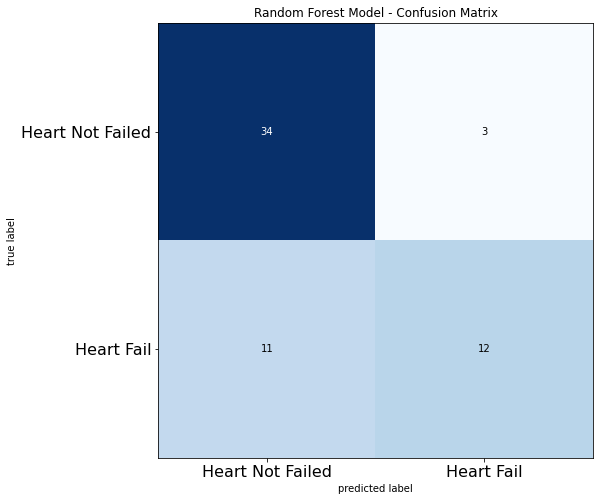

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

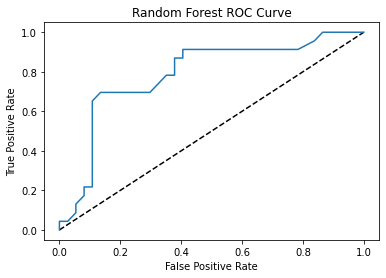

In [8]:
model = RandomForestClassifier(min_samples_split=2, class_weight={0:2,1:7}, random_state=13)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()